# Glenn Chia 
# 1003118
# 01.112 Machine Learning Homework 2 Question 1

# 1. K-Means [30 points]

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
hw2_qn1_path = './HW2_data/1/hw2-image.txt'
def read_data(file_path):
    with open(file_path, 'r') as file_data:
        coordintates = [np.array([int(x) for x in line.rstrip('\n').split(' ')]) for line in file_data]
    return coordintates
coordinates = read_data(hw2_qn1_path)

In [3]:
# input: 2 arrays. Each array is [x, y, z]
# output: Squared Euclidean distance
def compute_individual_loss(point_one, point_two):
    return np.sum((point_one - point_two) ** 2)
compute_individual_loss(coordinates[0], coordinates[1])

388

In [4]:
initial_centroids = [[255, 255, 255], [255, 0, 0], [128, 0, 0], [0, 255, 0], [0, 128, 0], [0, 0, 255], [0, 0, 128], [0, 0, 0]]
initial_centroids = np.array([np.array(centroid) for centroid in initial_centroids])
print(initial_centroids)

[[255 255 255]
 [255   0   0]
 [128   0   0]
 [  0 255   0]
 [  0 128   0]
 [  0   0 255]
 [  0   0 128]
 [  0   0   0]]


In [5]:
def k_means_clustering(coordinates, cluster_number, initial_centroids):
    change_status = True
    old_centroids = initial_centroids
    total_loss = math.inf
    counter = 1
    loss_history = []
    while change_status: 
        print('iteration: {}'.format(counter))
        counter += 1
        cluster_assignment = [[], [], [], [], [], [], [], []]
        new_centroids = []
        new_loss = 0
        # Cluster the points first
        for index_coordinate, coordinate in enumerate(coordinates):
            reference_individual_loss = math.inf # Since 195075 id the largest possible squared euclidean distance
            for index_centroid, centroid in enumerate(old_centroids):
                # Check if the centroid is an integer ()
                if str(type(centroid)) == "<class 'numpy.ndarray'>":
                    new_individual_loss = compute_individual_loss(coordinate, centroid)
                    if new_individual_loss < reference_individual_loss:
                        assignment = index_centroid
                        reference_individual_loss = new_individual_loss
            cluster_assignment[assignment].append(coordinate)
        # Recalculate the centroid based on each cluster
        for index_cluster, value_cluster in enumerate(cluster_assignment):
            if(len(value_cluster) == 0):
                new_centroids.append(0)
            else:
                new_centroid = (np.sum(value_cluster, axis=0)/len(value_cluster)) #.astype(int)
                new_centroids.append(new_centroid)
                for index_coordinate, coordinate in enumerate(value_cluster):
                    new_loss += compute_individual_loss(coordinate, new_centroid)
        old_centroids = new_centroids
        # Check for loss
        print(new_loss)
        if new_loss < total_loss:
            total_loss = new_loss
            loss_history.append(new_loss)
        else:
            change_status = False
    return cluster_assignment, new_centroids, loss_history
cluster_assignment, new_centroids, loss_history = k_means_clustering(coordinates, 8, initial_centroids)

iteration: 1
340316684.38417476
iteration: 2
183025425.3424653
iteration: 3
170742827.06460875
iteration: 4
156809662.22456604
iteration: 5
134268985.15269423
iteration: 6
130100346.06848319
iteration: 7
129763194.71800756
iteration: 8
129668514.31460547
iteration: 9
129617277.21963887
iteration: 10
129586574.62849163
iteration: 11
129569365.88814013
iteration: 12
129548951.04084305
iteration: 13
129535553.41981779
iteration: 14
129518973.49273516
iteration: 15
129504002.49864988
iteration: 16
129488225.13710675
iteration: 17
129473579.02860008
iteration: 18
129454202.88018076
iteration: 19
129432885.28915738
iteration: 20
129397712.73004597
iteration: 21
129328051.26664047
iteration: 22
129140633.62422693
iteration: 23
128566727.58414571
iteration: 24
126462691.89793825
iteration: 25
122853348.67253365
iteration: 26
120732801.6994679
iteration: 27
119474552.32317877
iteration: 28
118685954.53044546
iteration: 29
118237837.67500521
iteration: 30
118046085.26928467
iteration: 31
1179672

## 1(a) How many clusters there are in the end. (A cluster can “disappear” in one iteration of the algorithm if no vectors are closest to its centroid.)

In [10]:
def find_cluster_number(clusters):
    counter = 0
    for cluster in clusters:
        if str(type(cluster)) == "<class 'numpy.ndarray'>":
            counter += 1
    return counter
print('The number of clusters at the end is {}'.format(find_cluster_number(new_centroids)))

The number of clusters at the end is 6


## 1(b) The final centroids of each cluster.

In [15]:
def find_final_centroids(centroids):
    counter = 0 
    for centroid in centroids:
        if str(type(centroid)) == "<class 'numpy.ndarray'>":
            print('Cluster {} has centroid {}'.format(counter, centroid))
        else:
            print('Cluster {} has no centroid'.format(counter))
        counter += 1
    return True
print(find_final_centroids(new_centroids))

Cluster 0 has centroid [241.2296146  238.62515213 233.86288032]
Cluster 1 has centroid [194.41158657 136.33311389  90.94364714]
Cluster 2 has centroid [136.2655563   61.08973066  10.10385457]
Cluster 3 has no centroid
Cluster 4 has centroid [157.29173273  97.59397508  51.43329558]
Cluster 5 has no centroid
Cluster 6 has centroid [78.92743714 37.10828688 13.07070482]
Cluster 7 has centroid [25.97800232 23.23575423 23.60599063]
True


## 1(c) The number of pixels associated to each cluster

In [8]:
def pixels_to_cluster(clusters, centroids):
    pixel_count = 0
    for index_cluster, value_cluster in enumerate(clusters):
        print('Cluster {}, {} has {} pixels'.format(index_cluster, centroids[index_cluster], len(value_cluster)))
        pixel_count += len(value_cluster)
    print('The total number of pixels is {}'.format(pixel_count))
    return True
pixels_to_cluster(cluster_assignment, new_centroids)

Cluster 0, [241.2296146  238.62515213 233.86288032] has 4930 pixels
Cluster 1, [194.41158657 136.33311389  90.94364714] has 15190 pixels
Cluster 2, [136.2655563   61.08973066  10.10385457] has 52535 pixels
Cluster 3, 0 has 0 pixels
Cluster 4, [157.29173273  97.59397508  51.43329558] has 22075 pixels
Cluster 5, 0 has 0 pixels
Cluster 6, [78.92743714 37.10828688 13.07070482] has 40365 pixels
Cluster 7, [25.97800232 23.23575423 23.60599063] has 74917 pixels
The total number of pixels is 210012


True

## 1(d) Plot the squared Euclidean distance from each pixel to the nearest centroid after every iteration of the algorithm.

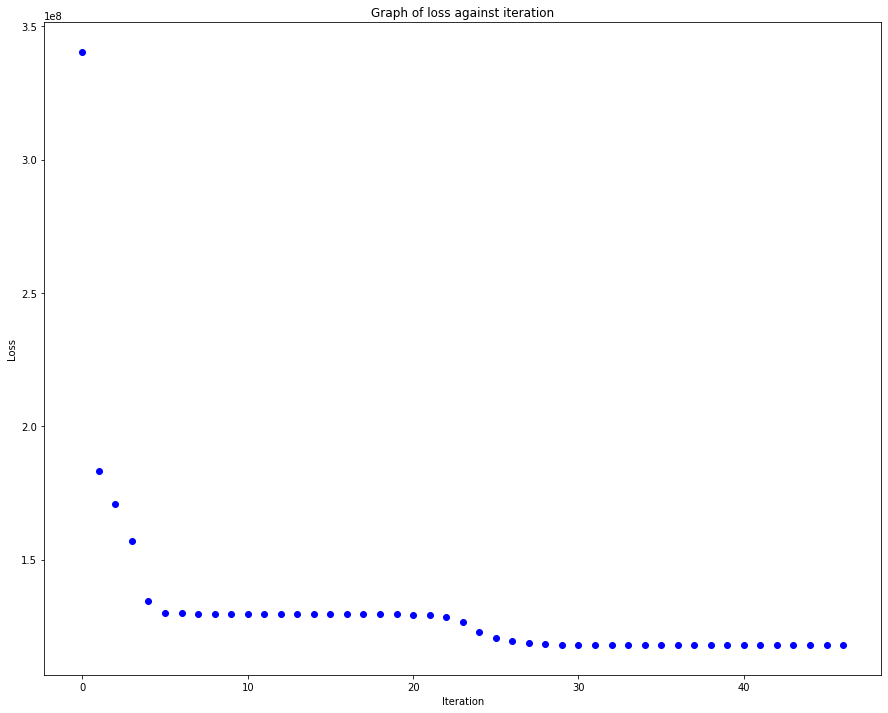

In [9]:
plt.figure(figsize=(15,12))
plt.scatter(x=[i for i in range(len(loss_history))], y=loss_history, color='b')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Graph of loss against iteration')
plt.show()

## Visualize your result by replacing each pixel with the centroid to which it is closest, and displaying the resulting image.

In [16]:
from PIL import Image

In [32]:
def display_image(coordinates, centroids):
    #im = Image.new("RGB", (516,407))
    im = Image.new("RGB", (407, 516))
    pixels = []
    filtered_centroids = []
    data = []
    for centroid in centroids:
        if str(type(centroid)) == "<class 'numpy.ndarray'>":
            filtered_centroids.append(centroid.astype(int))
    for index_coordinate, coordinate in enumerate(coordinates):
            reference_individual_loss = math.inf # Since 195075 id the largest possible squared euclidean distance
            for index_centroid, centroid in enumerate(filtered_centroids):
                if str(type(centroid)) == "<class 'numpy.ndarray'>":
                    new_individual_loss = compute_individual_loss(coordinate, centroid)
                    if new_individual_loss < reference_individual_loss:
                        reference_individual_loss = new_individual_loss
                        reference_centroid = tuple(centroid.tolist())
            data.append(reference_centroid)
    im.putdata(data)
    im.save("clustered.png")
display_image(coordinates, new_centroids)

![](clustered.png)